<a href="https://colab.research.google.com/github/ikadeksandratiana/DataAnalytics/blob/main/SeabornTugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 135MB/s]


In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: heart_2020_cleaned.csv  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv(r'heart_2020_cleaned.csv')

In [8]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [9]:
df.info() # we have  0 null val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df.describe().transpose()

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

In [11]:
df.corr()

BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000

In [12]:
df["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

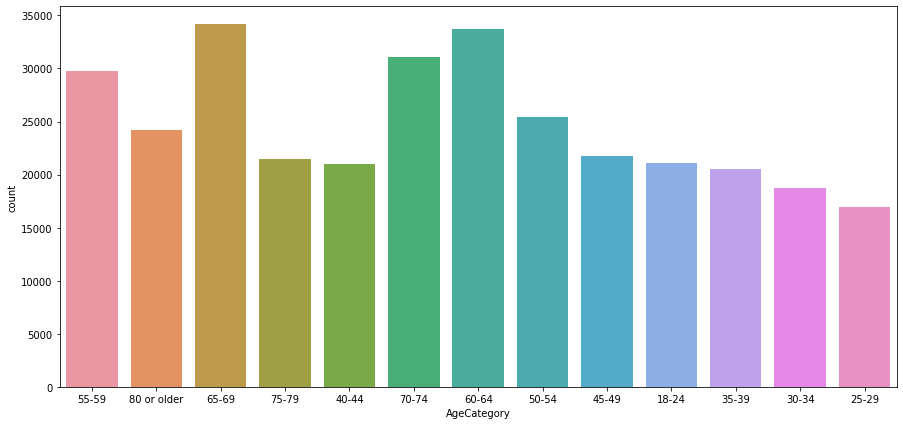

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="AgeCategory")

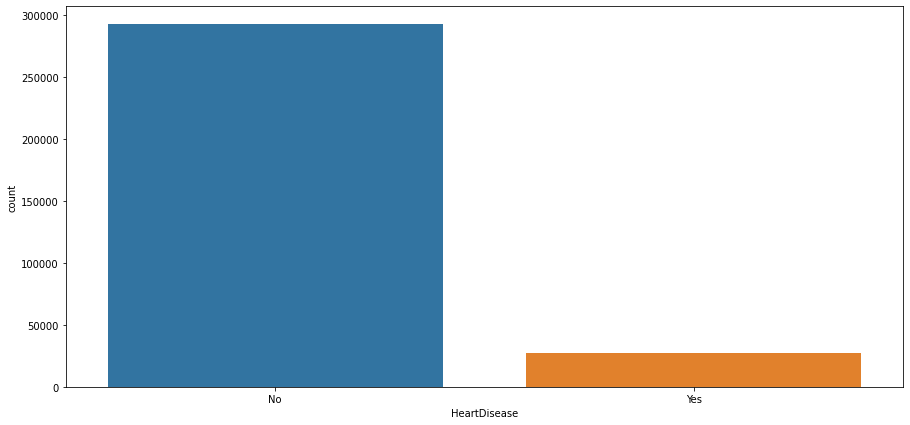

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="HeartDisease")
# Most of patients have No heartDisease

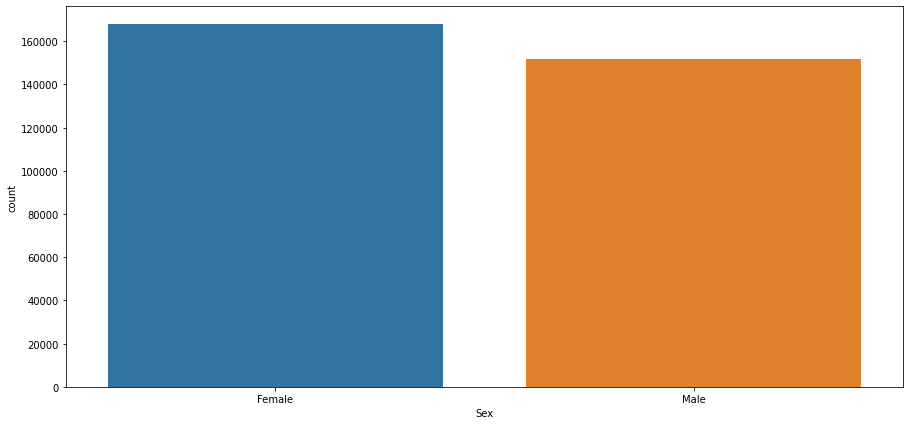

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="Sex")
# Female > Male

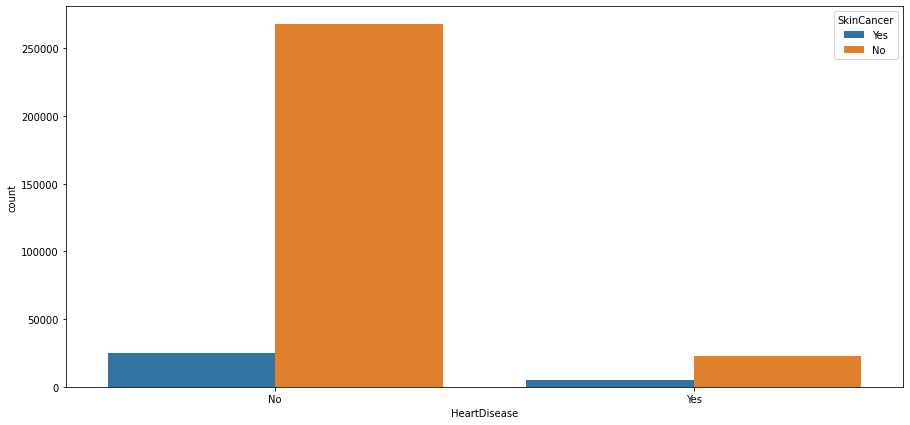

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="HeartDisease",hue="SkinCancer")

In [17]:
px.box(df,x="HeartDisease",y="AgeCategory")
# older patients has a more change To have a HeartDisease

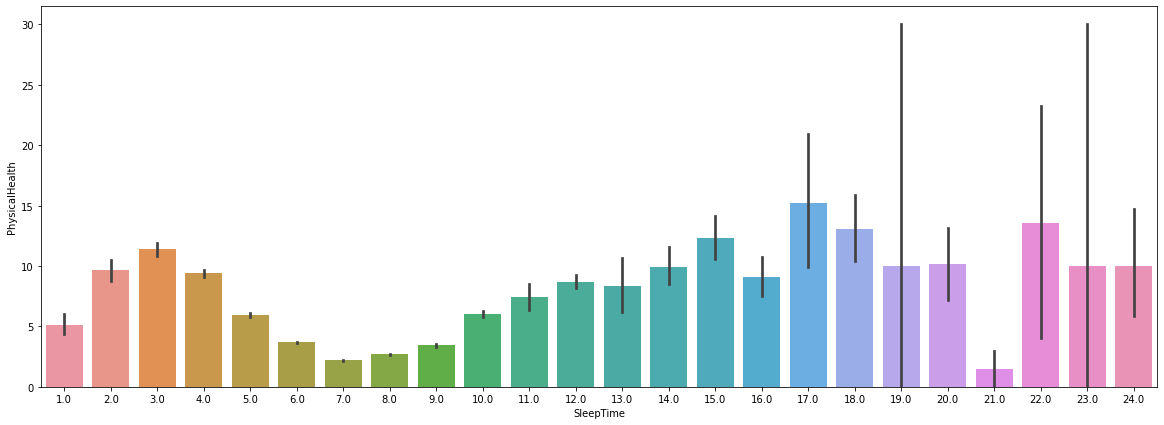

In [18]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="SleepTime",y="PhysicalHealth")
# We can say that SleepTime (6.0-9.0) is the best for PhysicalHealth

In [19]:
px.pie(df,names="Smoking")
# Most of Patients are non-smokers

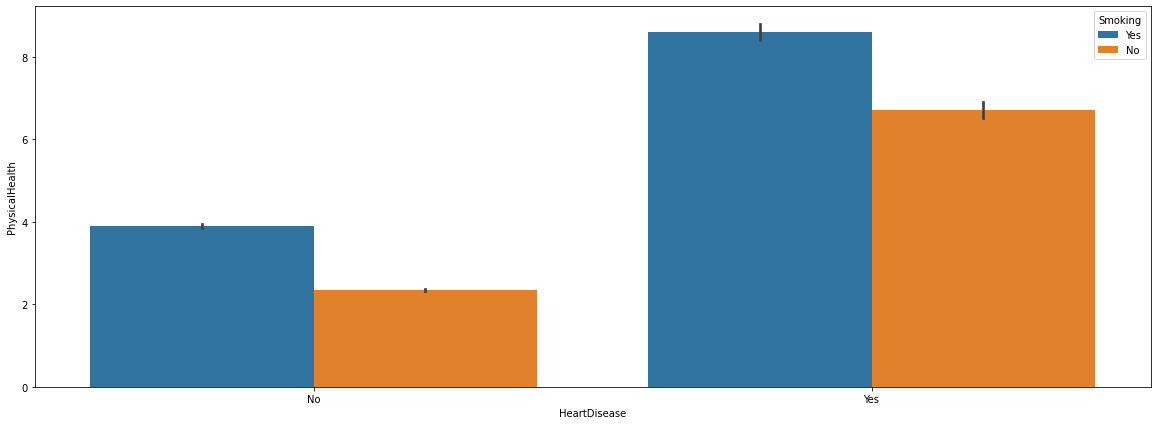

In [20]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="HeartDisease",y="PhysicalHealth",hue="Smoking")
# Most of patients with HeartDisease had A bad PhysicalHealth

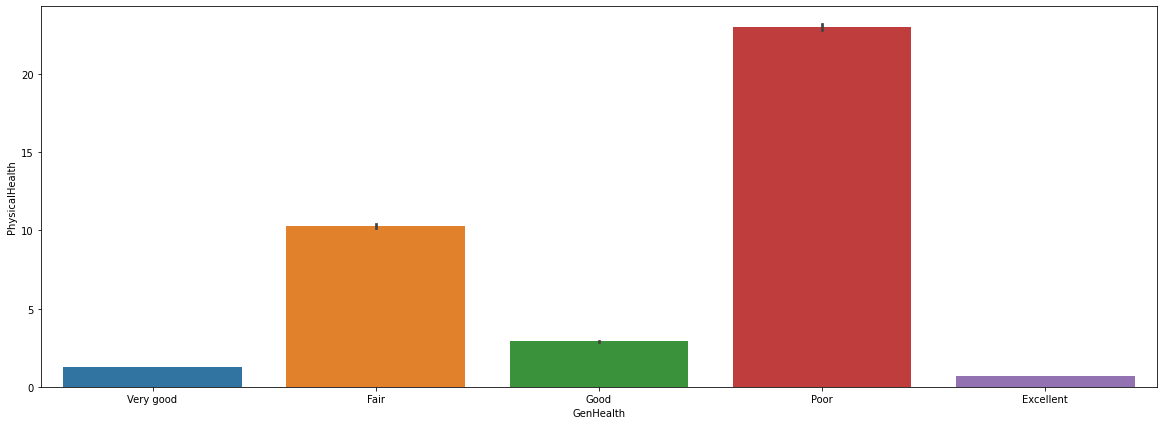

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="GenHealth",y="PhysicalHealth")
# Having a good GenHealth lead to better PhysicalHealth 

In [22]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No